*This lab looks at a hmeq databse with info on loans, and uses it to train a model to predict whether or not a person will default on their loans. *

#Imports

In [1]:
import pandas as pd

#Read in hmeq_small.csv

In [2]:
hmeq = pd.read_csv('/content/drive/MyDrive/CS 356/hmeq.csv')

#Describe your features here

In [3]:
hmeq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [4]:
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


The BAD column represents whether or not a client defaulted (1) or did not default (0) on their loan payment

LOAN: represents the loan amount requested by the client.

MORTDUe represents the existing morgage due for the property

VALUE represents the value of the property

REASON represents the reason for the lone

JOB represents the job type of the client

YOJ represents the number of years in the job for the clien

DEROG represents the number of major derogatory reports on the clients credit history

DELINQ represents the number of delinquent credit lines on the clients credit history

CLAGE represents the age of the oldest trade line in months

NINQ represents the number of recent credit lines on the clients credit history

CLNO represents the number of credit lines on the clients credit history

DEBTINC represents the debt to income ration for the client



#Create a new data frame with the rows with missing values dropped

In [5]:
hmeqDelete = hmeq.dropna()
hmeqDelete.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


#Create a new data frame with the missing values filled in by the mean of the column

In [6]:
#find numeric
numeric_cols = hmeq.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = hmeq.select_dtypes(include=['object']).columns

In [7]:
hmeqReplace = hmeq.copy()
hmeqReplace[numeric_cols] = hmeqReplace[numeric_cols].fillna(hmeqReplace[numeric_cols].mean())
hmeqReplace['REASON']= hmeqReplace['REASON'].fillna('Other reason')
hmeqReplace['JOB'].fillna(hmeqReplace['JOB'].mode()[0], inplace=True)



In [8]:
hmeqReplace['REASON'].value_counts()


REASON
DebtCon         3928
HomeImp         1780
Other reason     252
Name: count, dtype: int64

In [9]:
print(hmeq['JOB'].value_counts(), '\n')

hmeqReplace['JOB'].value_counts()

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64 



JOB
Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

#Print the means of the columns for each new data frame

In [10]:
print("Means for hmeqDelete are: \n")

hmeqDelete.describe().loc['mean']


Means for hmeqDelete are: 



BAD             0.089180
LOAN        19154.399524
MORTDUE     76249.621581
VALUE      107501.385850
YOJ             9.110285
DEROG           0.146849
DELINQ          0.278835
CLAGE         180.993684
NINQ            1.037455
CLNO           22.114150
DEBTINC        34.135451
Name: mean, dtype: float64

In [11]:
print("Means for hmeqReplace are: \n ")

hmeqReplace.describe().loc['mean']

Means for hmeqReplace are: 
 


BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
Name: mean, dtype: float64

#Part 2

In [12]:
hmeq_copy = hmeqReplace.copy()

In [13]:
hmeq_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


##Standardize data - ignore object columns

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
from sklearn.impute import SimpleImputer

In [15]:
numeric_columns = hmeq_copy.select_dtypes(include=['float64', 'int64'])
scaler_standard = StandardScaler()
hmeq_standard = pd.DataFrame(scaler_standard.fit_transform(numeric_columns), columns=numeric_columns.columns)
hmeq_standard

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,2.003151,-1.562299,-1.127666e+00,-1.104011e+00,2.179581e-01,-0.320564,-4.196817e-01,-1.022064e+00,-0.112562,-1.236106e+00,0.000000
1,2.003151,-1.544453,-8.728829e-02,-5.872016e-01,-2.655546e-01,-0.320564,1.447884e+00,-6.933423e-01,-0.717557,-7.334643e-01,0.000000
2,2.003151,-1.526606,-1.418642e+00,-1.496786e+00,-6.799940e-01,-0.320564,-4.196817e-01,-3.626262e-01,-0.112562,-1.135578e+00,0.000000
3,2.003151,-1.526606,3.425767e-16,-2.560192e-16,-2.453974e-16,0.000000,-5.183537e-17,6.803029e-16,0.000000,3.571484e-16,0.000000
4,-0.499213,-1.508759,5.659230e-01,1.798751e-01,-8.181404e-01,-0.320564,-4.196817e-01,-1.034431e+00,-0.717557,-7.334643e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5955,-0.499213,6.272411,-3.883630e-01,-2.039272e-01,9.777637e-01,-0.320564,-4.196817e-01,5.031646e-01,-0.717557,-5.324077e-01,0.305609
5956,-0.499213,6.281335,-4.516430e-01,-1.555098e-01,9.777637e-01,-0.320564,-4.196817e-01,3.461843e-01,-0.717557,-6.329360e-01,0.272541
5957,-0.499213,6.299181,-4.641437e-01,-1.557385e-01,8.396172e-01,-0.320564,-4.196817e-01,3.891211e-01,-0.717557,-6.329360e-01,0.232791
5958,-0.499213,6.352722,-5.506594e-01,-1.744404e-01,7.014707e-01,-0.320564,-4.196817e-01,4.084257e-01,-0.717557,-5.324077e-01,0.073501


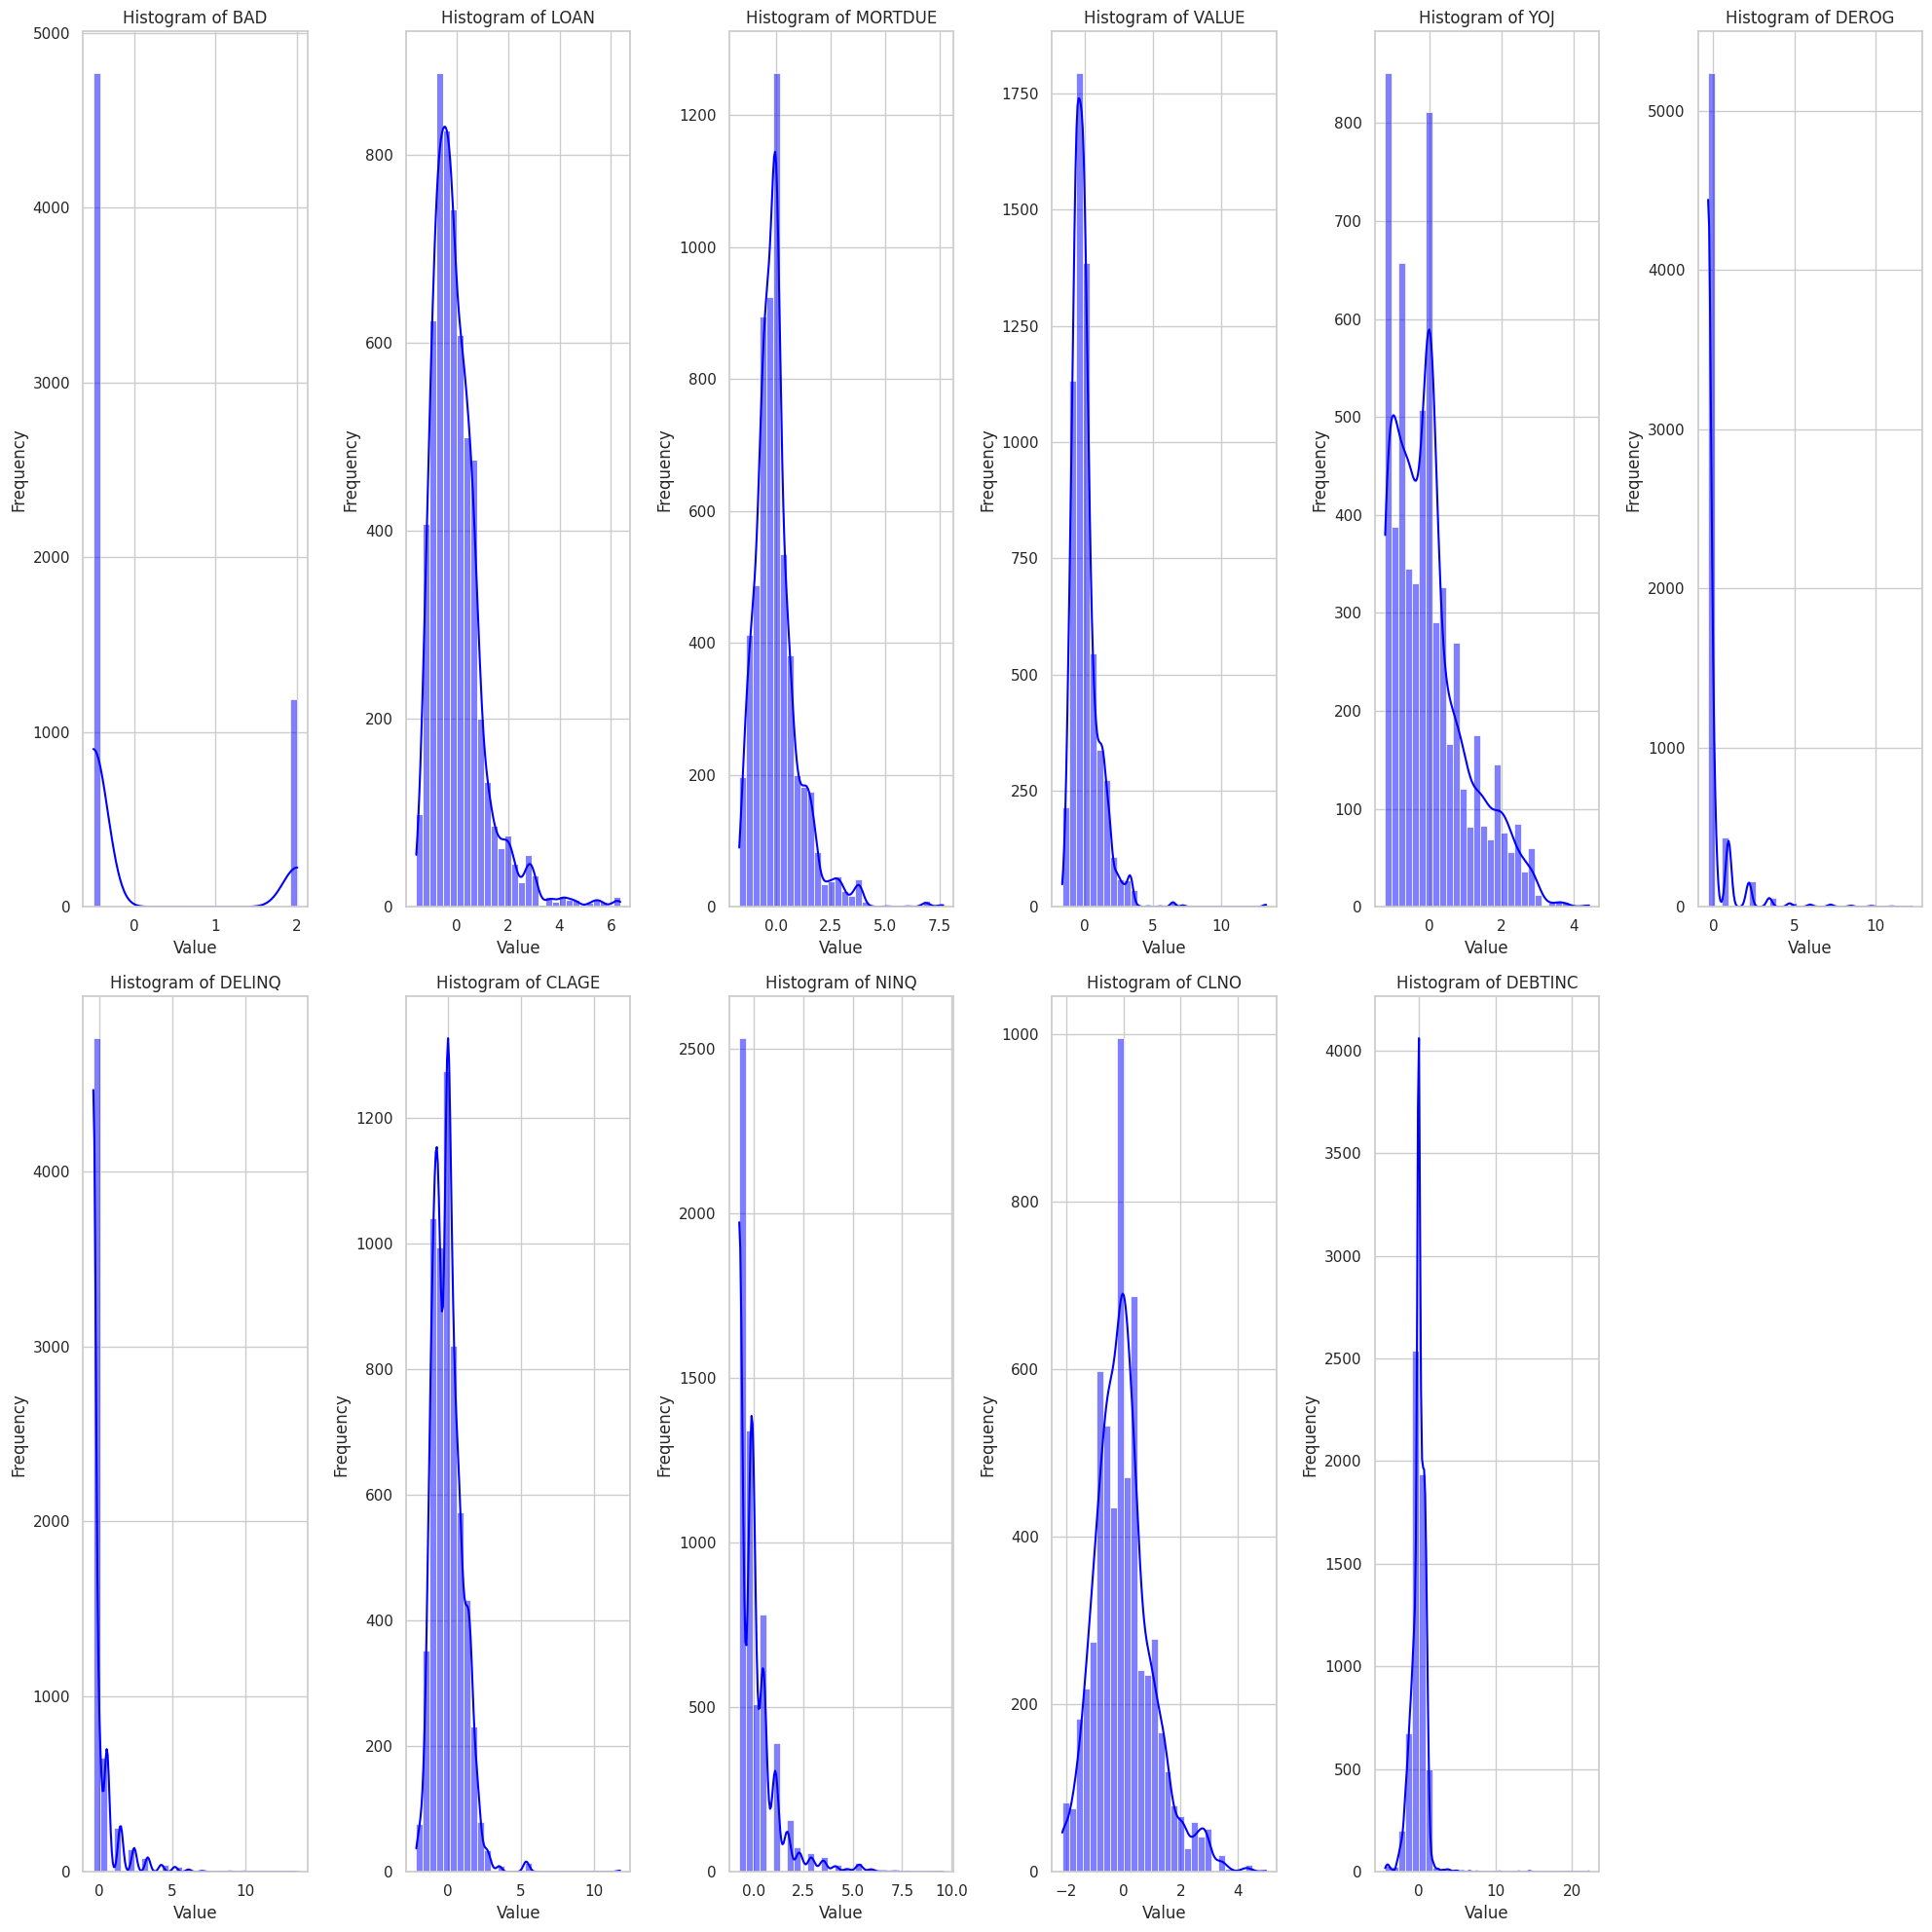

In [16]:
#Plot standardized data

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# Create subplots for each column
for i, column in enumerate(hmeq_standard.columns, 1):
    plt.subplot(2, (len(hmeq_standard.columns) + 1) // 2, i)
    sns.histplot(hmeq_standard[column], kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [17]:
# Print mean and standard deviation for standardized data
print("Means of Standardized Data:\n", hmeq_standard.mean(axis=0))
print("Standard Deviations of Standardized Data:\n", hmeq_standard.std(axis=0))

Means of Standardized Data:
 BAD       -1.907497e-17
LOAN      -1.525998e-16
MORTDUE    1.525998e-16
VALUE     -2.288997e-16
YOJ       -1.955185e-16
DEROG     -3.814995e-17
DELINQ    -1.669060e-17
CLAGE      2.861246e-16
NINQ      -5.484055e-17
CLNO       2.670496e-16
DEBTINC   -9.394424e-16
dtype: float64
Standard Deviations of Standardized Data:
 BAD        1.000084
LOAN       1.000084
MORTDUE    1.000084
VALUE      1.000084
YOJ        1.000084
DEROG      1.000084
DELINQ     1.000084
CLAGE      1.000084
NINQ       1.000084
CLNO       1.000084
DEBTINC    1.000084
dtype: float64


The means are always 0 and the standard deviations 1 for standardized data. In this case, the means are approaching 0 and the standard deviation are 1.

##Normalize data - ignore object columns

In [18]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Select only numeric columns for normalization
numeric_columns = hmeq_copy.select_dtypes(include=['float64', 'int64'])

normalizer_standard = Normalizer()
normalized_data = normalizer_standard.fit_transform(numeric_columns)
hmeq_normalizer = pd.DataFrame(normalized_data, columns=numeric_columns.columns)
hmeq_normalizer

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0.000021,0.023490,0.552228,0.833360,0.000224,0.000000,0.000000,0.002015,0.000021,0.000192,0.000721
1,0.000010,0.013277,0.715434,0.698553,0.000071,0.000000,0.000020,0.001244,0.000000,0.000143,0.000345
2,0.000046,0.069680,0.627118,0.775768,0.000186,0.000000,0.000000,0.006943,0.000046,0.000465,0.001569
3,0.000008,0.011933,0.586785,0.809653,0.000071,0.000002,0.000004,0.001430,0.000009,0.000169,0.000269
4,0.000000,0.011432,0.657699,0.753193,0.000020,0.000000,0.000000,0.000628,0.000000,0.000094,0.000227
...,...,...,...,...,...,...,...,...,...,...,...
5955,0.000000,0.639655,0.412027,0.648901,0.000115,0.000000,0.000000,0.001596,0.000000,0.000115,0.000260
5956,0.000000,0.636741,0.390458,0.664907,0.000114,0.000000,0.000000,0.001493,0.000000,0.000107,0.000257
5957,0.000000,0.638571,0.386901,0.665231,0.000107,0.000000,0.000000,0.001520,0.000000,0.000107,0.000255
5958,0.000000,0.650799,0.365042,0.665735,0.000101,0.000000,0.000000,0.001550,0.000000,0.000116,0.000249


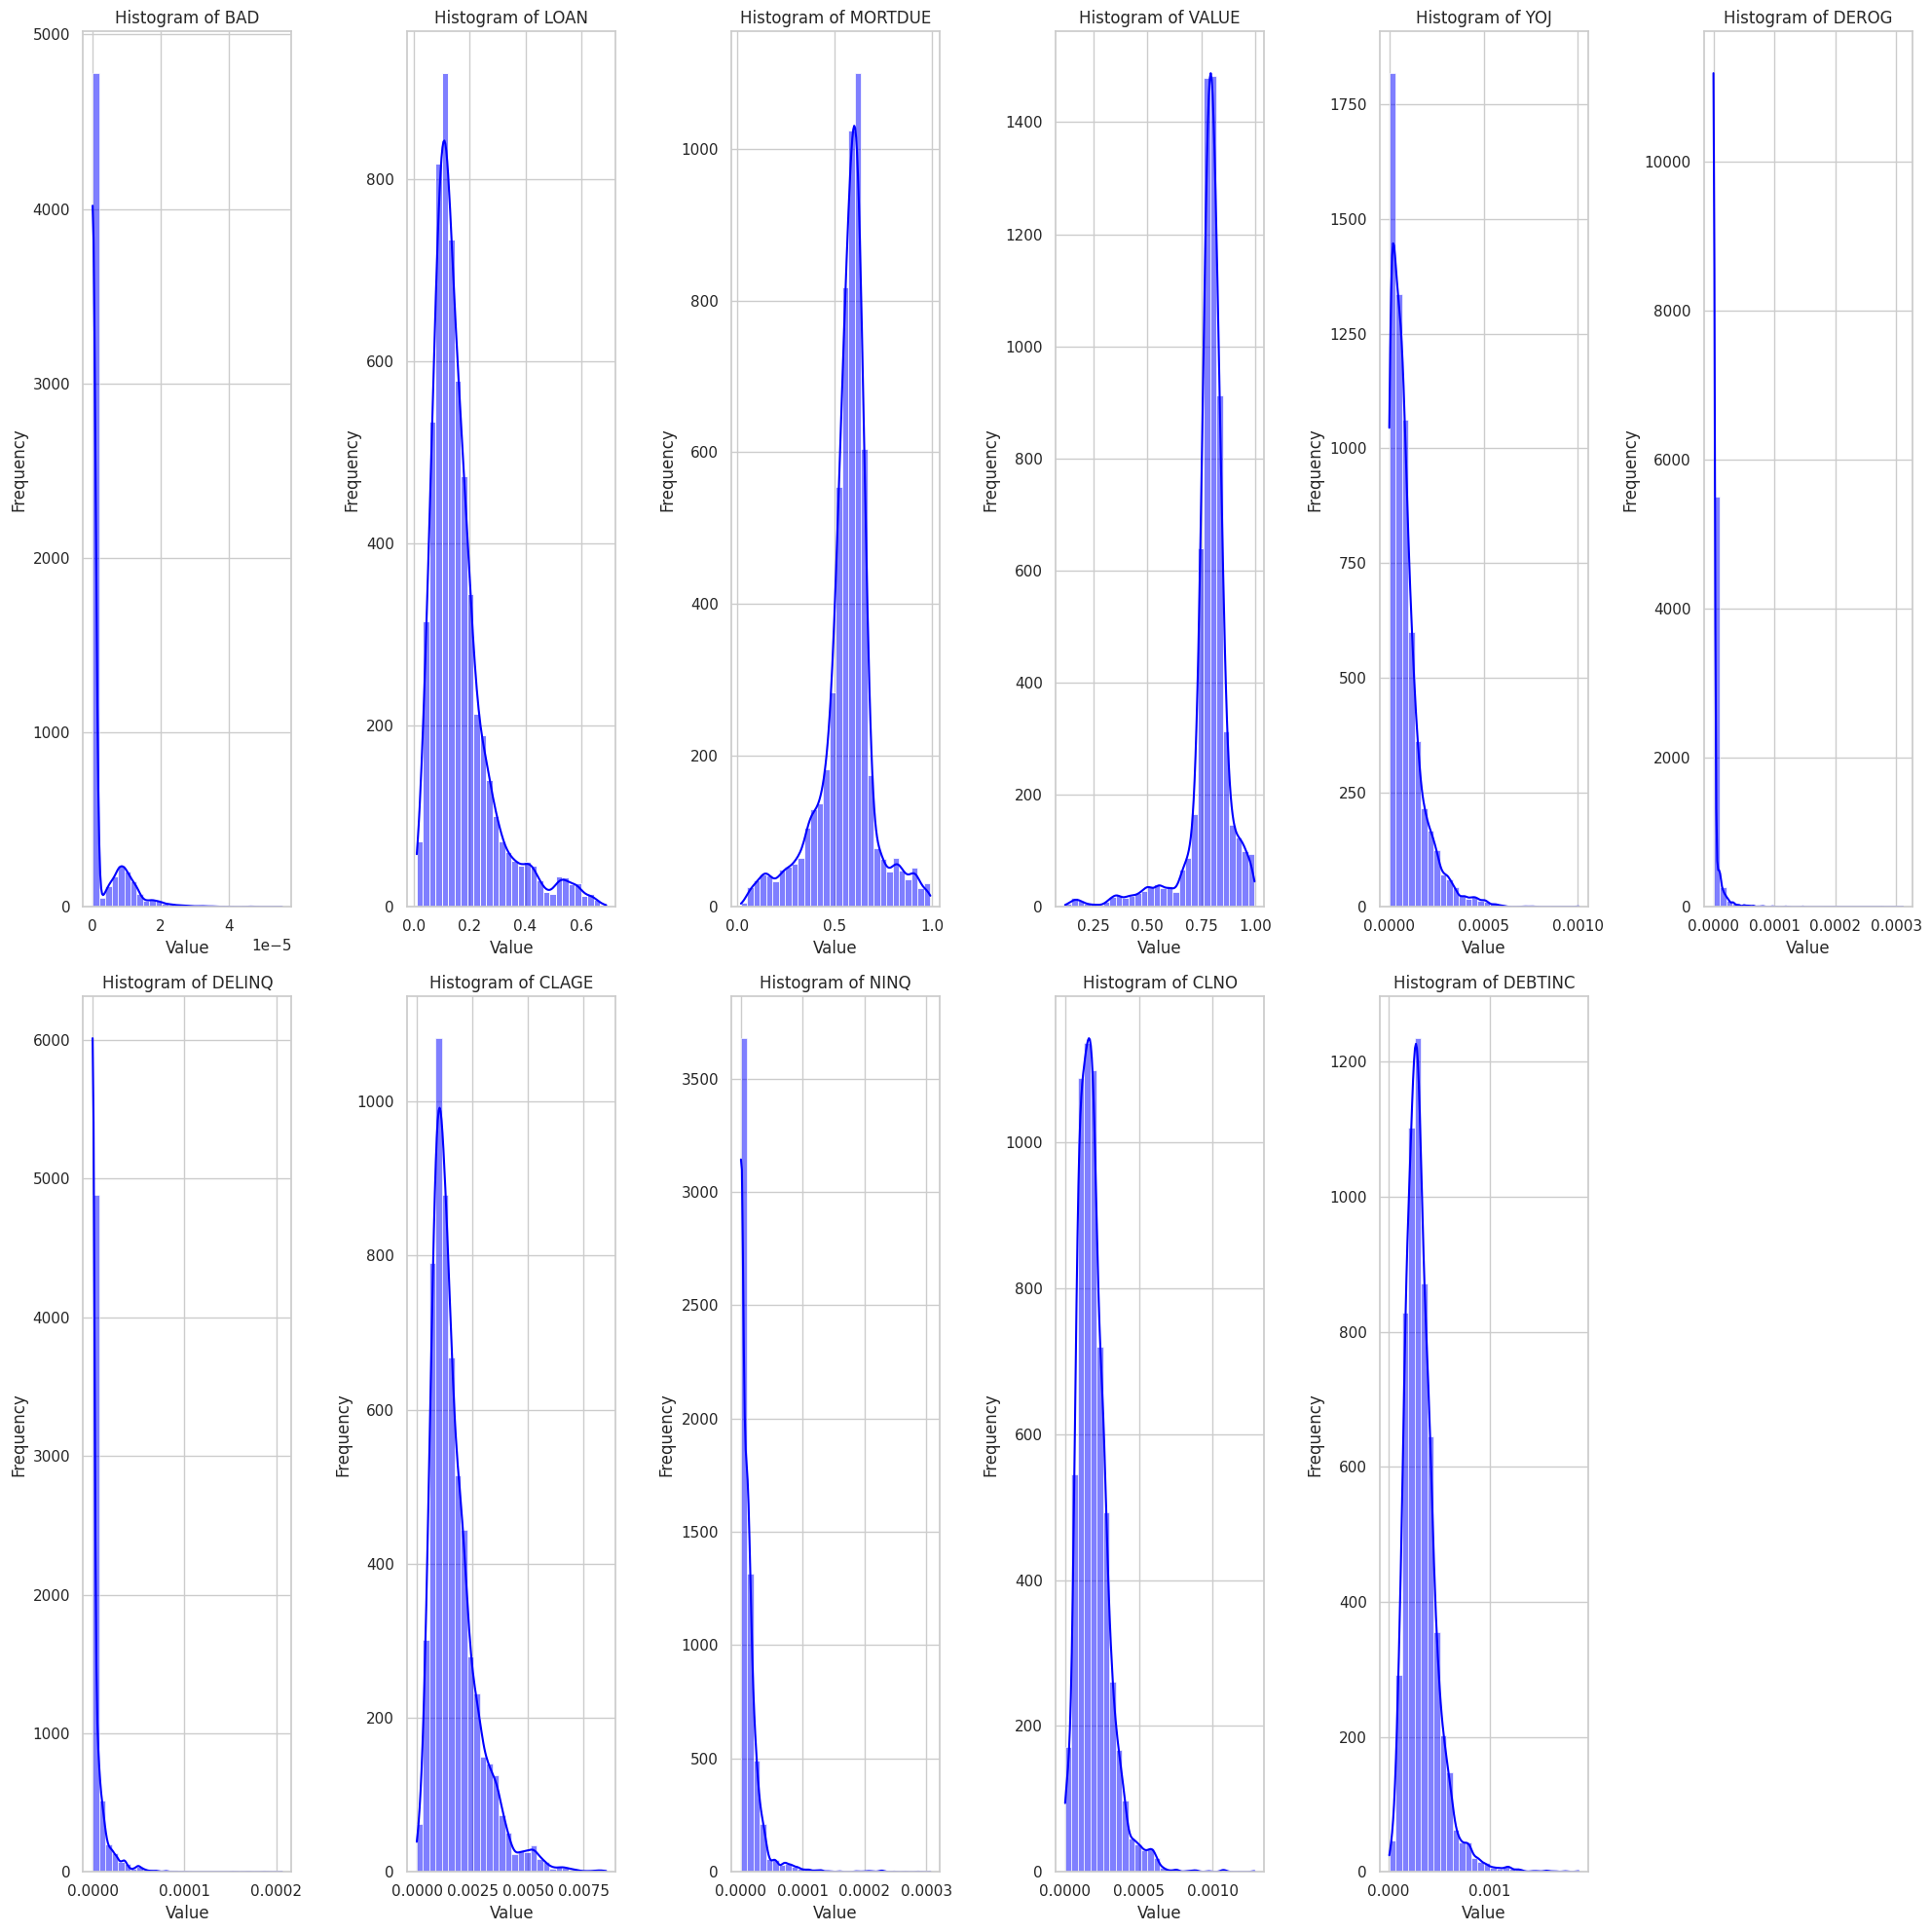

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# Create subplots for each column
for i, column in enumerate(hmeq_normalizer.columns, 1):
    plt.subplot(2, (len(hmeq_normalizer.columns) + 1) // 2, i)
    sns.histplot(hmeq_normalizer[column], kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [20]:
# Print mean and standard deviation for normalized data
print("\nMeans of Normalized Data:\n", hmeq_normalizer.mean(axis=0))
print("Standard Deviations of Normalized Data:\n", hmeq_normalizer.std(axis=0))


Means of Normalized Data:
 BAD        0.000002
LOAN       0.163062
MORTDUE    0.563528
VALUE      0.784386
YOJ        0.000086
DEROG      0.000003
DELINQ     0.000004
CLAGE      0.001654
NINQ       0.000011
CLNO       0.000189
DEBTINC    0.000318
dtype: float64
Standard Deviations of Normalized Data:
 BAD        0.000005
LOAN       0.107277
MORTDUE    0.136651
VALUE      0.102014
YOJ        0.000088
DEROG      0.000010
DELINQ     0.000011
CLAGE      0.001048
NINQ       0.000020
CLNO       0.000108
DEBTINC    0.000163
dtype: float64


it should be the standard deviation divided by the mean.

#Part 3

##Preprocessing

Im going to use the copy that i replaced the nans with the mean or other reason

In [21]:
df=hmeqReplace.copy()
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,Other reason,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882


In [22]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

In [23]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

##Outliers

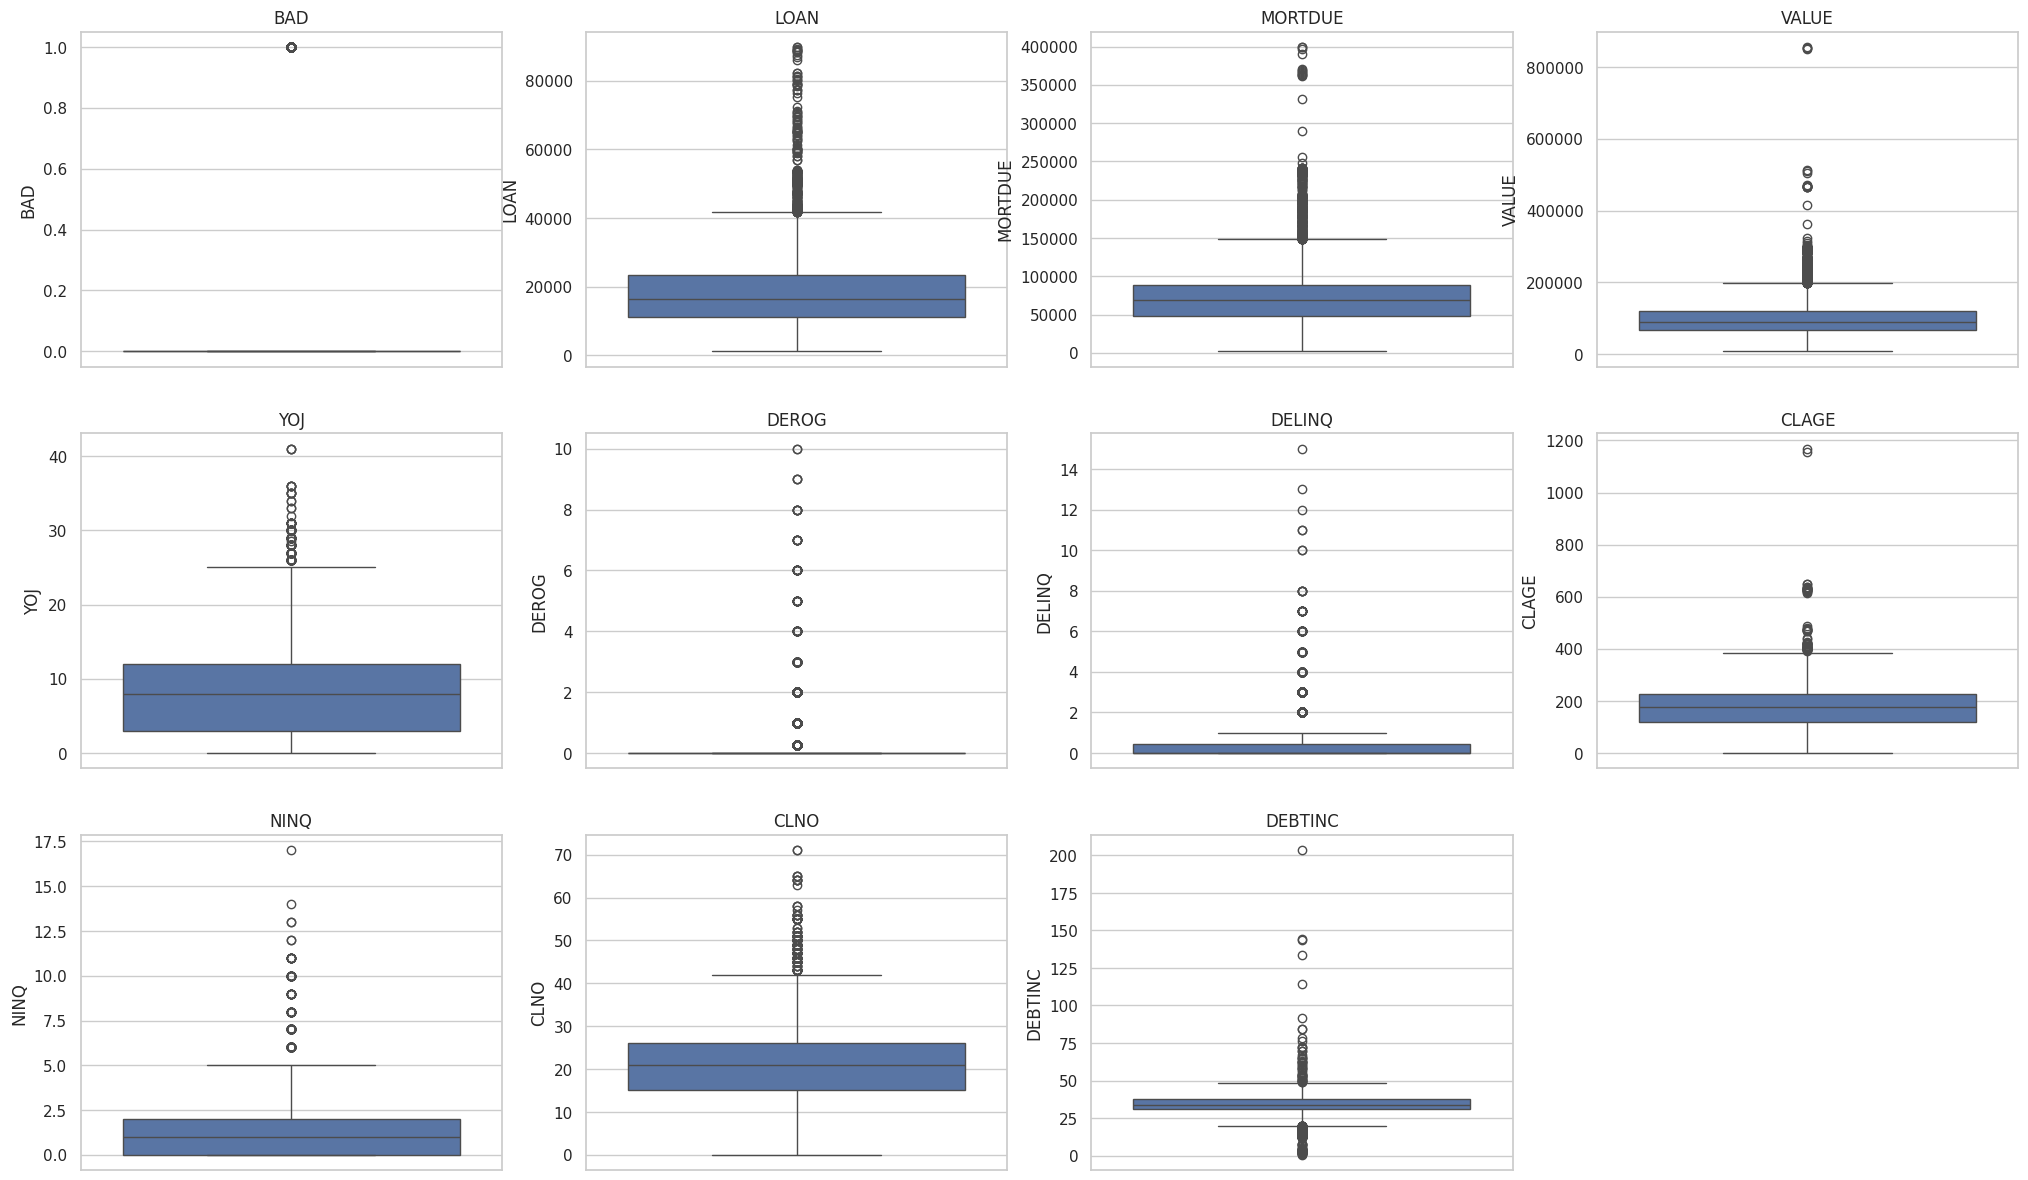

In [24]:
plt.figure(figsize=(25, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=numeric_columns[column])
    plt.title(column)

plt.show()

There are outliers.

Correlation Matrix:
              BAD      LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ  \
BAD      1.000000 -0.075099 -0.046034 -0.028852 -0.058314  0.264068  0.341472   
LOAN    -0.075099  1.000000  0.216100  0.331862  0.100664 -0.001256 -0.033879   
MORTDUE -0.046034  0.216100  1.000000  0.779787 -0.082856 -0.044358 -0.000974   
VALUE   -0.028852  0.331862  0.779787  1.000000  0.007382 -0.044744 -0.013521   
YOJ     -0.058314  0.100664 -0.082856  0.007382  1.000000 -0.059263  0.037314   
DEROG    0.264068 -0.001256 -0.044358 -0.044744 -0.059263  1.000000  0.184901   
DELINQ   0.341472 -0.033879 -0.000974 -0.013521  0.037314  0.184901  1.000000   
CLAGE   -0.165113  0.086874  0.130757  0.167938  0.190937 -0.077468  0.021810   
NINQ     0.168851  0.043160  0.029480 -0.004216 -0.067898  0.155494  0.064407   
CLNO    -0.004067  0.071804  0.305288  0.264037  0.024023  0.057948  0.159105   
DEBTINC  0.124324  0.074823  0.128326  0.115796 -0.047642  0.011194  0.029939   

       

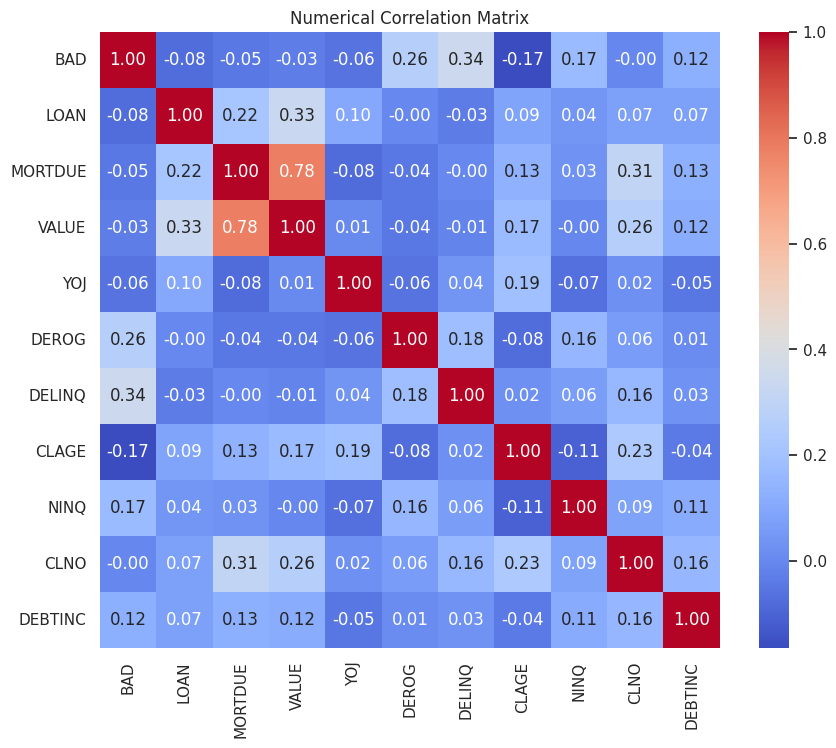

In [25]:
# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Correlation Matrix')
plt.show()

The strongest positive correlation is between MORTDUE (mortgage due) and VALUE (property value) at 0.7798, indicating that higher mortgage amounts correspond to higher property values. LOAN and VALUE also have a positive correlation of 0.3319, showing that larger loans are generally associated with higher property values. Meanwhile, CLAGE (age of the oldest credit line) and BAD (loan applicant classified as "bad") exhibit a negative correlation of -0.1651, suggesting that applicants with older credit lines are less likely to be classified as "bad." Additionally, BAD is positively correlated with DELINQ (delinquencies) at 0.3415 and DEROG (derogatory marks) at 0.2641, implying that more delinquencies and derogatory marks increase the likelihood of an applicant being classified as "bad."

DELINQ, DEROG, CLAGE, NINQ, and DEBTINC should probably be used since there is a coorelation with BAD and isnt too strongly correlated.

##Model
Im going to use all of them for this right now

##Use logistic since output shoudl be binary. Default, or not default

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target (y)
X = df.drop(columns=['BAD', 'MORTDUE']) #MORTDUE too related to value
y = df['BAD']
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train.head())  # Check the features to ensure 'BAD' is not included
#print(X_train)  # Check the target to ensure it is correctly set

numeric_columns = ['LOAN', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
categorical_features = ['REASON', 'JOB']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


In [79]:
# Output predictions and true values
print(f"Predictions: {y_pred}")
print(f"True Values: {y_test.values}")

Predictions: [0 0 0 ... 0 0 0]
True Values: [0 0 0 ... 0 0 0]


In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy of the Model: 0.8171140939597316

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       927
           1       0.70      0.31      0.43       265

    accuracy                           0.82      1192
   macro avg       0.76      0.64      0.66      1192
weighted avg       0.80      0.82      0.79      1192

MSE of the model: 0.18288590604026847


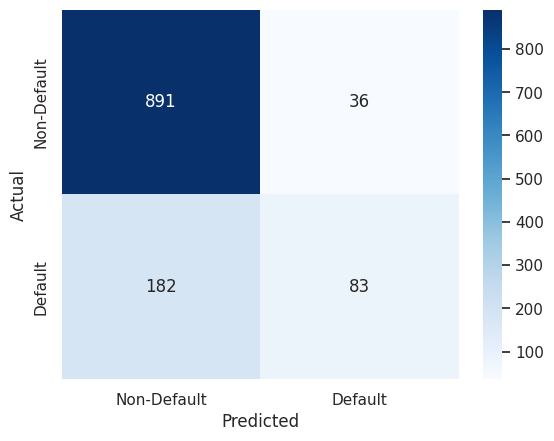

In [91]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
# Print results
print(f"Accuracy of the Model: {accuracy}")
print("\nClassification Report:\n", classification)
print(f"MSE of the model: {mse}")
# Display confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The accuracy of the logistic regression model was 82%. Meaning that the model correctly classified 82% of the cases. The precision is 0.83 for class 0 (non-defaults). Meaning that 83% of the predicted non-defaults were correct. 0.69 for the class 1 (Default). Recall was 0.96 for class 0, and 0.32 for class 1. The f1 score was 0.89 for class 0, and 0.44 for class 1. These classification results for this model mean that this model is good at predicting non-defaults but pretty bad at predicting those who will default. But, it also seems like there are fewer cases of defaults so the data is imbalanced.


Feature Coefficients (sorted by impact on loan default):
                Feature  Coefficient
16            JOB_Sales     0.918205
4                DELINQ     0.786797
13           JOB_Office    -0.726795
3                 DEROG     0.480771
5                 CLAGE    -0.449435
8               DEBTINC     0.365633
17             JOB_Self     0.357732
6                  NINQ     0.305747
12              JOB_Mgr    -0.262250
10       REASON_HomeImp     0.234766
0                  LOAN    -0.210868
15          JOB_ProfExe    -0.193343
7                  CLNO    -0.175208
11  REASON_Other reason    -0.157275
1                 VALUE     0.110418
2                   YOJ    -0.103113
14            JOB_Other    -0.095042
9        REASON_DebtCon    -0.078985


<ipython-input-96-37aea6f19fbe>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_summary, palette='coolwarm', orient='h')


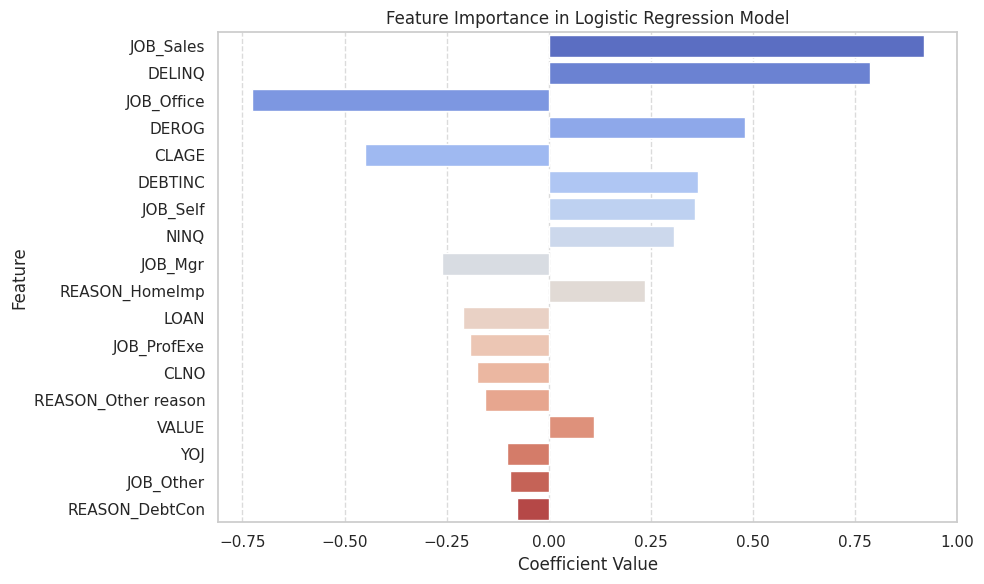

In [96]:
# Extract feature names after transformation
num_features = numeric_columns
cat_features = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = list(num_features) + list(cat_features)

# Extract logistic regression coefficients
model = pipeline.named_steps['model']
coefficients = model.coef_.flatten()

coef_summary = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})
coef_summary['AbsCoefficient'] = coef_summary['Coefficient'].abs()
coef_summary = coef_summary.sort_values(by='AbsCoefficient', ascending=False)
print("\nFeature Coefficients (sorted by impact on loan default):")
print(coef_summary[['Feature', 'Coefficient']])

# Plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_summary, palette='coolwarm', orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It seems like a job in sales significantly increases the risk of default. THere is a high coreffeceint for DELINQ as well, suggesting that a higher number of delinquent past accounts is a strong predicator of defaulting. Havinf a derogatory public recors and higher debt-to-income ration also increases the default risk. Those who have office jobs and managment positions are less likely to default. The longer credit ages are also associated with lower default risk.

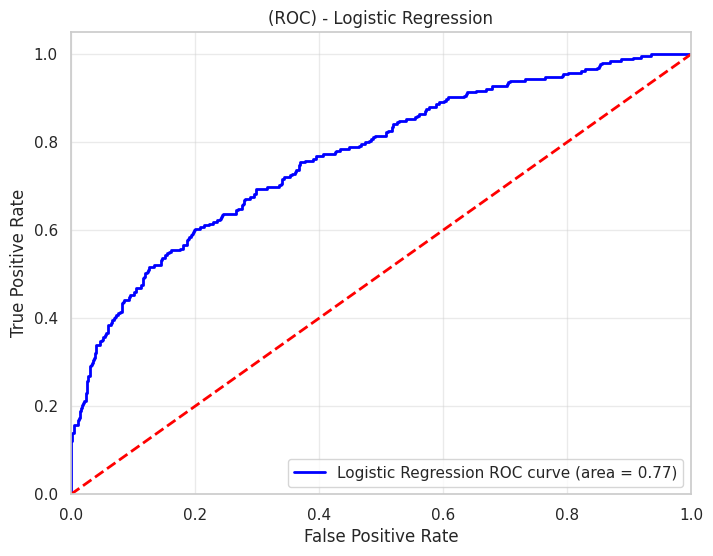

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'pipeline' is your logistic regression model and it's already trained with 'X_train' and 'y_train'
# Predict probabilities for the positive class
y_probs_logistic = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC area for the logistic regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_probs_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_probs_logistic)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

Area under the curve is 0.77 which menas that it correcly distinguishes between defaults and non-defaults 77% of the time.

##Try decisiontree classifer

0.12919463087248323
Decision Tree Classifier:
Accuracy: 0.8708053691275168
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       927
           1       0.74      0.64      0.69       265

    accuracy                           0.87      1192
   macro avg       0.82      0.79      0.80      1192
weighted avg       0.87      0.87      0.87      1192



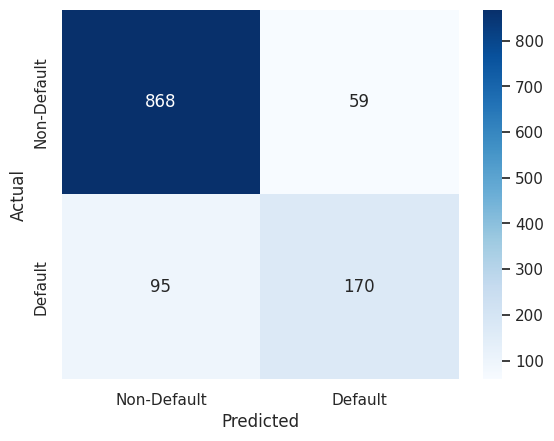

In [108]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
tree_model = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessor from before
    ('classifier', DecisionTreeClassifier(random_state=42))
])

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse= mean_squared_error(y_test, y_pred_tree)
print(mse)

# Evaluate the Decision Tree model
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(classification_report(y_test, y_pred_tree))
confusion_tree = confusion_matrix(y_test, y_pred_tree)


# Display confusion matrix
sns.heatmap(confusion_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




accuracy is 87%, meaning that decision tree correctly predicted wheter a loan would default in 87% of the cases. The preciison is 90% for non-default, and 74% for defaults. Recall was 94% for non-default, and 64% for default. This model again seems to stuggle with correctly predicitng defaults.

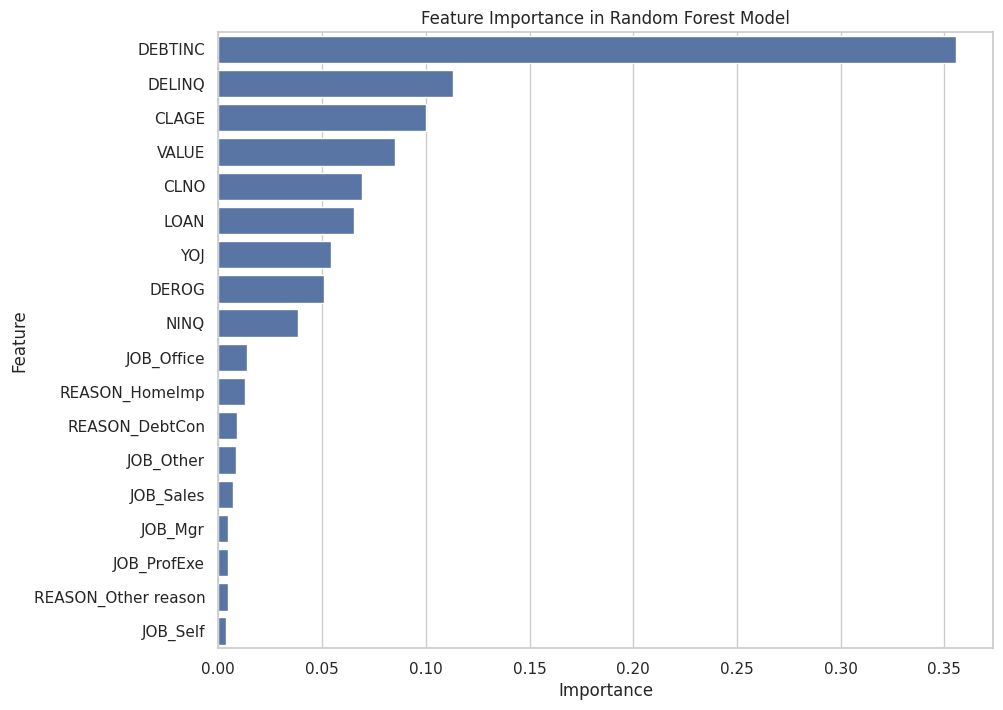

In [109]:

# Extract feature importances
feature_importances = tree_model.named_steps['classifier'].feature_importances_
# Get feature names from preprocessor
all_features = numeric_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create a DataFrame for feature importances
importances = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

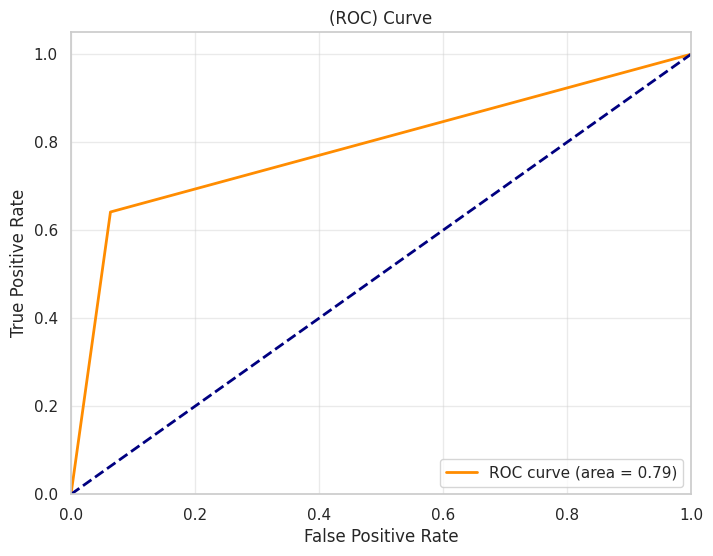

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = tree_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

Area under the curve is 0.79 which menas that it correcly distinguishes between defaults and non-defaults 79% of the time.

In this model, it seems like debt-to-income, clage, value, delinq, loan, clno are all important.

##Try random tree classifier

Random Forest Classifier:
Accuracy: 0.9169463087248322
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       927
           1       0.90      0.70      0.79       265

    accuracy                           0.92      1192
   macro avg       0.91      0.84      0.87      1192
weighted avg       0.92      0.92      0.91      1192

0.08305369127516779


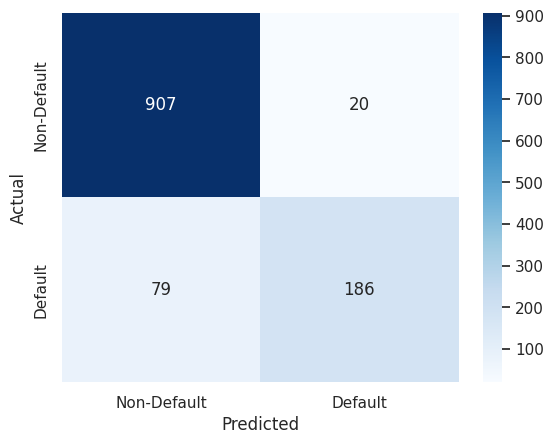

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
forest_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest)}")
print(classification_report(y_test, y_pred_forest))
mse= mean_squared_error(y_test, y_pred_forest)
print(mse)

confusion_forest = confusion_matrix(y_test, y_pred_forest)


# Display confusion matrix
sns.heatmap(confusion_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This is the best model for this. Accuracy is 92%. precision is above 90% for both. Recall is 985 for class 0, but 70% for class. It still struggled with accuratly predicting defaults. But, it is better than the other models.

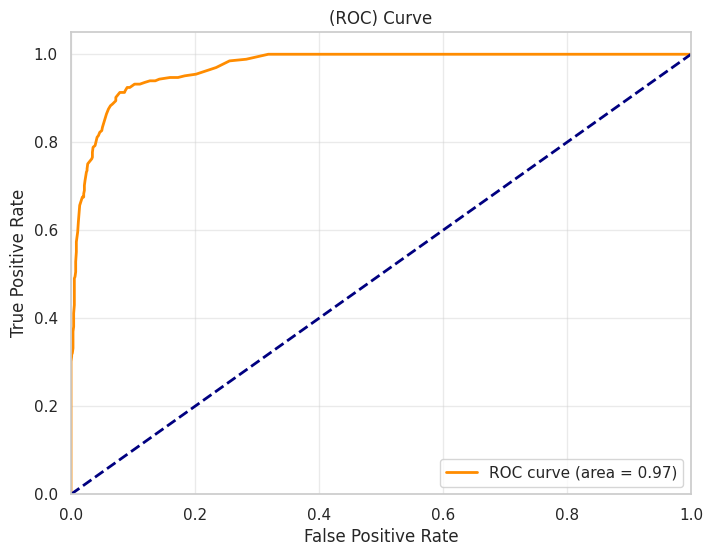

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = forest_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

Area under the curve is 0.97 which menas that it correcly distinguishes between defaults and non-defaults 97% of the time.

##Model deployment

Integrate this into the banks existing system, so it will recieve input data directly from the system and send back predictions. So when a customer applies for a loan, the system automatically collects their financial data, such as income, existing debts, employment status, and credit history (things this model uses) This data is fed into the model, which evaluates the information and calculates the probability of default. The model's prediction is then displayed on the loan officer's dashboard along with an explanation of the key factors influencing the risk assessment and the accuracy of the model... Based on the model’s recommendation, the loan officer can quickly decide to approve the loan, deny it, or forward the application for further review if the risk is borderline.
